<a href="https://colab.research.google.com/github/KhaiHuy123/ML__SVM__HCMUS__Course/blob/Khai-Huy/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** churn_rate_prediction.csv

**Requirements:**
1. Apply all knowledge and techniques that you have learned for this
2. You must organize your notebook based on the Homework
3. Should not drop Na, drop missing
4. Models: compare all models that you have learned or practiced
5. Can use pytorch & tensorflow
6. Automl (should not use)


**Deadline:** 2023-07-04

#Import Library

In [296]:
"""  """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Prepare Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering
5. Data Splitting.

# Load Data

In [297]:
path = '/content/Banking.csv'
df = pd.read_csv(path)
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


**Description** \
Loan ID : A unique for the loan


Loan_Amount_Requested : The listed amount of the loan applied for by the borrower

Length_Employed : Employment length in years

Home_Owner : The home ownership status provided by the borrower during registration -> Values are: Rent, Own, Mortgage, Other.

The annual income provided by the borrower during registration

Income_Verified : Indicates if income was verified, not verified, or if the income sourse was verified

Purpose_of_loan : a category provided by the borrower for the loan request

Debt_to_income : A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, devided by the borrower's self-reported monthly income.

Inquires_last_6Mo : the number of inquires by creditors during the past 6 months

Month_since_deliquency : the number of months since the borrower's last deliquency

Number_open_accounts : the number of open cerdit lines in the borrower's credit file.

Total_accounts : The total number fo credit lines currently in the borrower's credit file

Gender : Gender

Interest_rate: (1 / 2 / 3)


# Explore Data Analysis(EDA)

In [298]:
df.shape

(164309, 14)

In [299]:
df.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [300]:
df.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [301]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O" ]
numerical_cols

['Loan_ID',
 'Annual_Income',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Interest_Rate']

In [302]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype != "O" ]
categorical_cols

['Loan_ID',
 'Annual_Income',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Interest_Rate']

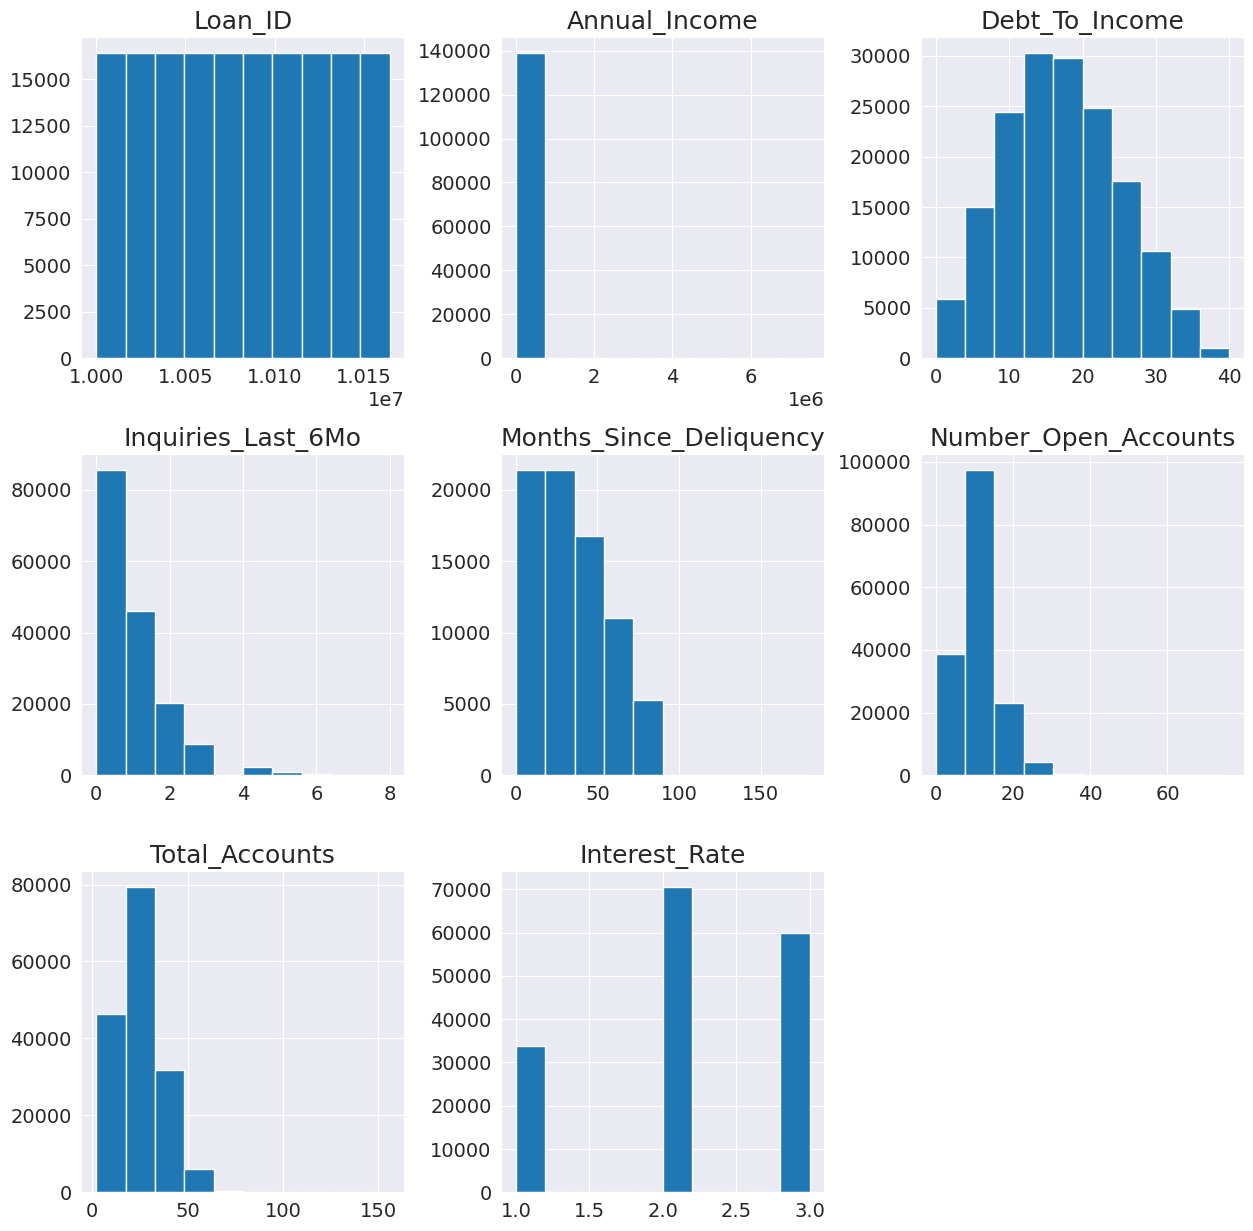

In [303]:
df.hist(figsize=(15, 15))
plt.show()

Debt_to_income : tuan theo phan phoi chuan

Inquires_last_6mo, number_open_accounts, months_since_deliquency, total_accounts : lech phai

# Preprocessing

In [304]:
# explore categorical cols
from tabulate import tabulate

# Lấy các cột bắt đầu từ cột thứ 3
df_ = df[df.columns[2:]]

# Tìm các cột có kiểu dữ liệu là object (categorical)
categorical_cols = [feature for feature in df_.columns if df_[feature].dtype == "O"]

# Tạo bảng dữ liệu
table_data = []
for col in categorical_cols:
    unique_values = ', '.join(df[col].unique().astype(str))
    table_data.append([col, unique_values])

# In ra bảng dữ liệu
print('\033[1m') # Bật chế độ in đậm
print(tabulate(table_data, headers=['Column', 'Unique Values'], tablefmt='grid'))
print('\033[0m') # Tắt chế độ in đậm


+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column          | Unique Values                                                                                                                                                           |
+=================+=========================================================================================================================================================================+
| Length_Employed | < 1 year, 4 years, 7 years, 8 years, 2 years, 10+ years, 1 year, nan, 6 years, 9 years, 3 years, 5 years                                                                |
+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Home_Owner      | Rent, Mortgage, nan, Own, Oth

In [305]:
# explore categorical cols
from tabulate import tabulate

# Lấy các cột bắt đầu từ cột thứ 3
df_ = df[df.columns[2:]]

# Tìm các cột có kiểu dữ liệu là object (categorical)
numerical_cols = [feature for feature in df_.columns if df_[feature].dtype != "O"]

# Tạo bảng dữ liệu
table_data = []
for col in numerical_cols:
    unique_values = ', '.join(df[col].unique().astype(str))
    table_data.append([col, unique_values])

# In ra bảng dữ liệu
print('\033[1m') # Bật chế độ in đậm
print(tabulate(table_data, headers=['Column', 'Unique Values'], tablefmt='grid'))
print('\033[0m') # Tắt chế độ in đậm


+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Xu ly data bi incorrect

In [306]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [307]:
def replace_incorrect_value(df):
    # Loan Amount Requested
    df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].str.replace(',','')
    df['Loan_Amount_Requested']=pd.to_numeric(df['Loan_Amount_Requested'],errors='coerce')
    # Length Employed
    df['Length_Employed']=df['Length_Employed'].str.replace('<','')
    df['Length_Employed']=df['Length_Employed'].str.replace('+','')
    df['Length_Employed'] = df['Length_Employed'].astype(str)
    df['Length_Employed'] = df['Length_Employed'].apply(lambda x: x.strip())
    df['Length_Employed'] = df['Length_Employed'].str.replace(r'\byears?\b', '', regex=True)
    # Home Owner
    df['Home_Owner'] = df['Home_Owner'].replace(['None', np.nan], np.nan)
    # Annual Income

    # Income_Verified
    df.Income_Verified=df.Income_Verified.replace(['VERIFIED - income source','VERIFIED - income'],['Verified']*2)
    df.Income_Verified=df.Income_Verified.replace('not verified','Not_Verified')
    # Purpose_Of_Loan
    # Debt_To_Income
    # Inquiries_Last_6Mo
    # Months_Since_Deliquency
    # Number_Open_Accounts
    # Total_Accounts
    # Gender
    # Interest_Rate
    return df

In [308]:
df = replace_incorrect_value(df)

In [309]:
df.tail(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164304,10164305,20725,10,Rent,NaN,Verified,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,6000,8,Own,NaN,Verified,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,20250,10,Mortgage,NaN,Verified,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,10000,4,Rent,NaN,Not_Verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,9250,10,Rent,NaN,Verified,credit_card,19.44,1,NaN,5,9,Female,2


In [310]:
# explore categorical cols
from tabulate import tabulate

# Lấy các cột bắt đầu từ cột thứ 3
df_ = df[df.columns[2:]]


# Tạo bảng dữ liệu
table_data = []
for col in categorical_cols:
    unique_values = ', '.join(df[col].unique().astype(str))
    table_data.append([col, unique_values])

# In ra bảng dữ liệu
print('\033[1m') # Bật chế độ in đậm
print(tabulate(table_data, headers=['Column', 'Unique Values'], tablefmt='grid'))
print('\033[0m') # Tắt chế độ in đậm


+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column          | Unique Values                                                                                                                                                           |
+=================+=========================================================================================================================================================================+
| Length_Employed | 1 , 4 , 7 , 8 , 2 , 10 , nan, 6 , 9 , 3 , 5                                                                                                                             |
+-----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Home_Owner      | Rent, Mortgage, nan, Own, Oth

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_income_distribution(df, column):
    # Định dạng biểu đồ
    sns.set_style('darkgrid')
    plt.rcParams['figure.figsize'] = (20, 6)
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14

    # Tạo lưới các Axes
    fig, axes = plt.subplots(1, 2)

    # Vẽ biểu đồ histogram
    sns.histplot(data=df, x=column, kde=False, bins=10, color='#1E90FF', edgecolor='black', ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    # Vẽ biểu đồ density plot
    sns.kdeplot(data=df, x=column, color='#1E90FF', linewidth=3, ax=axes[1])
    axes[1].set_title(f'Density Plot of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')

    # Hiển thị biểu đồ
    plt.show()

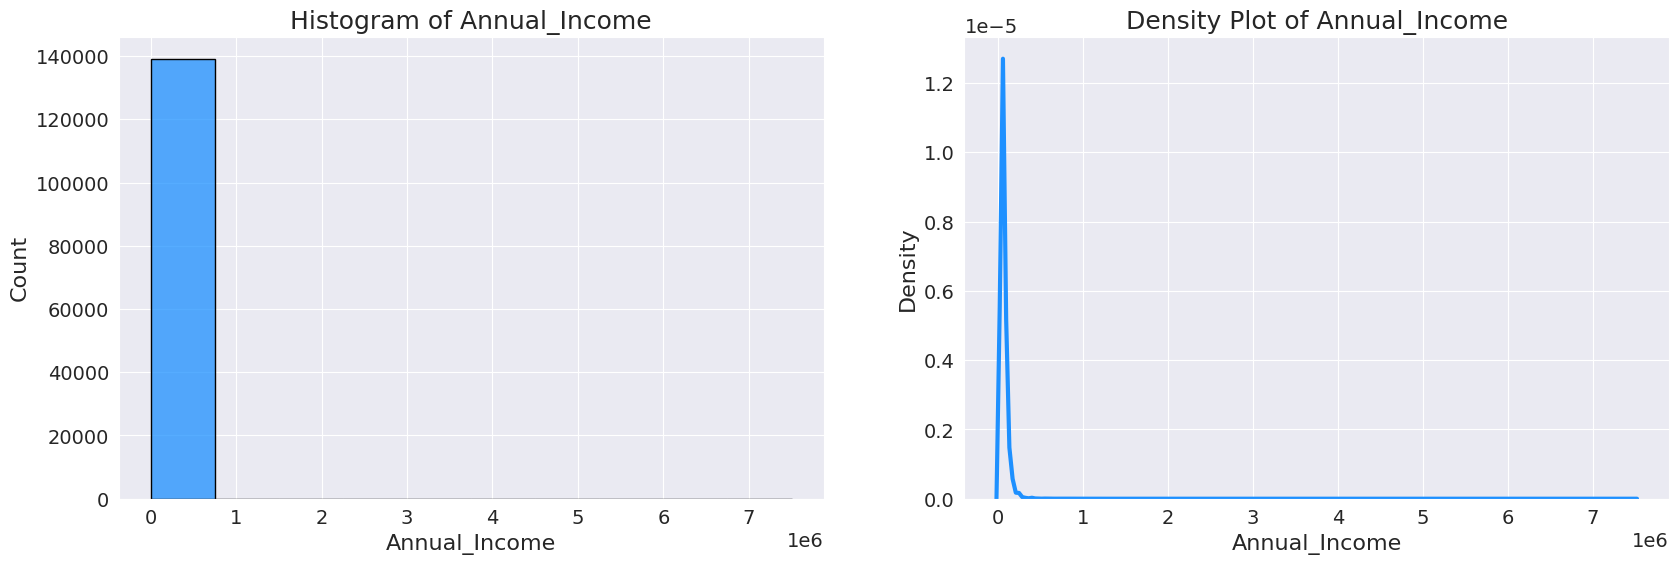

In [312]:
# Sử dụng hàm vừa tạo để vẽ biểu đồ cho cột 'Annual_Income'
plot_income_distribution(df, 'Annual_Income')

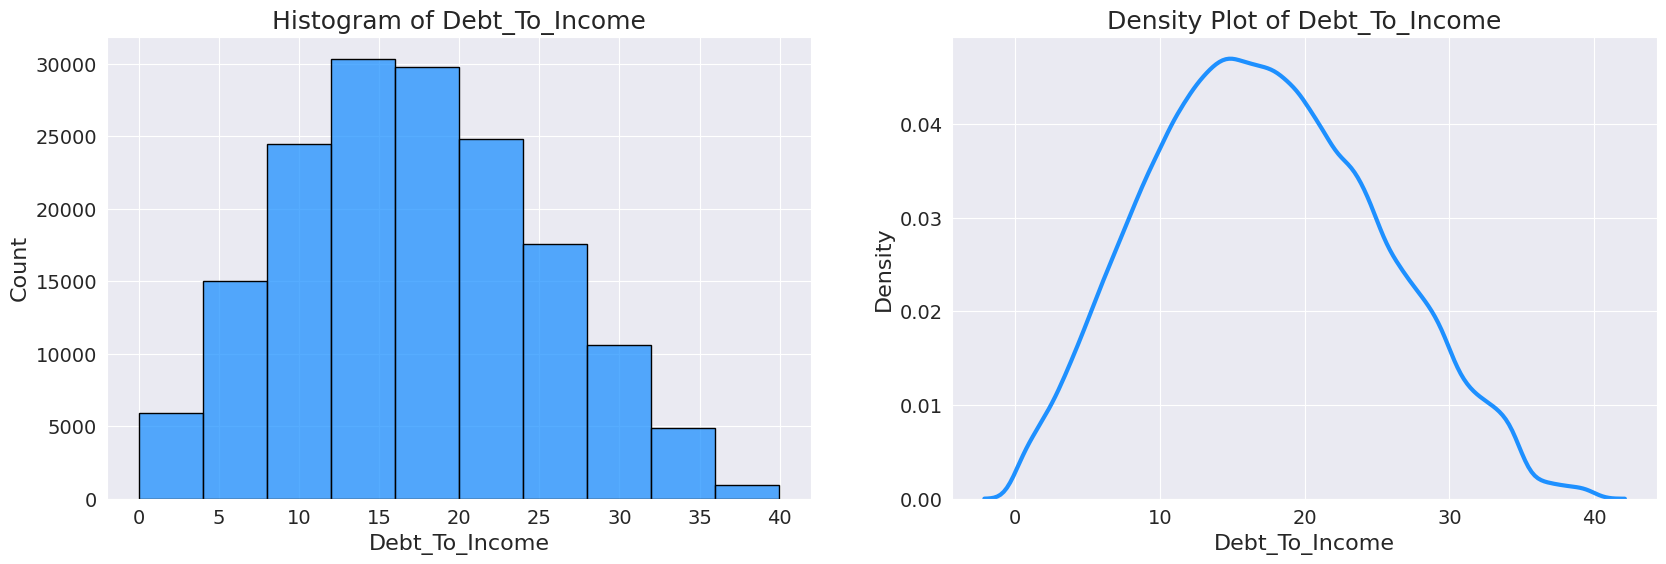

In [313]:
plot_income_distribution(df, 'Debt_To_Income')

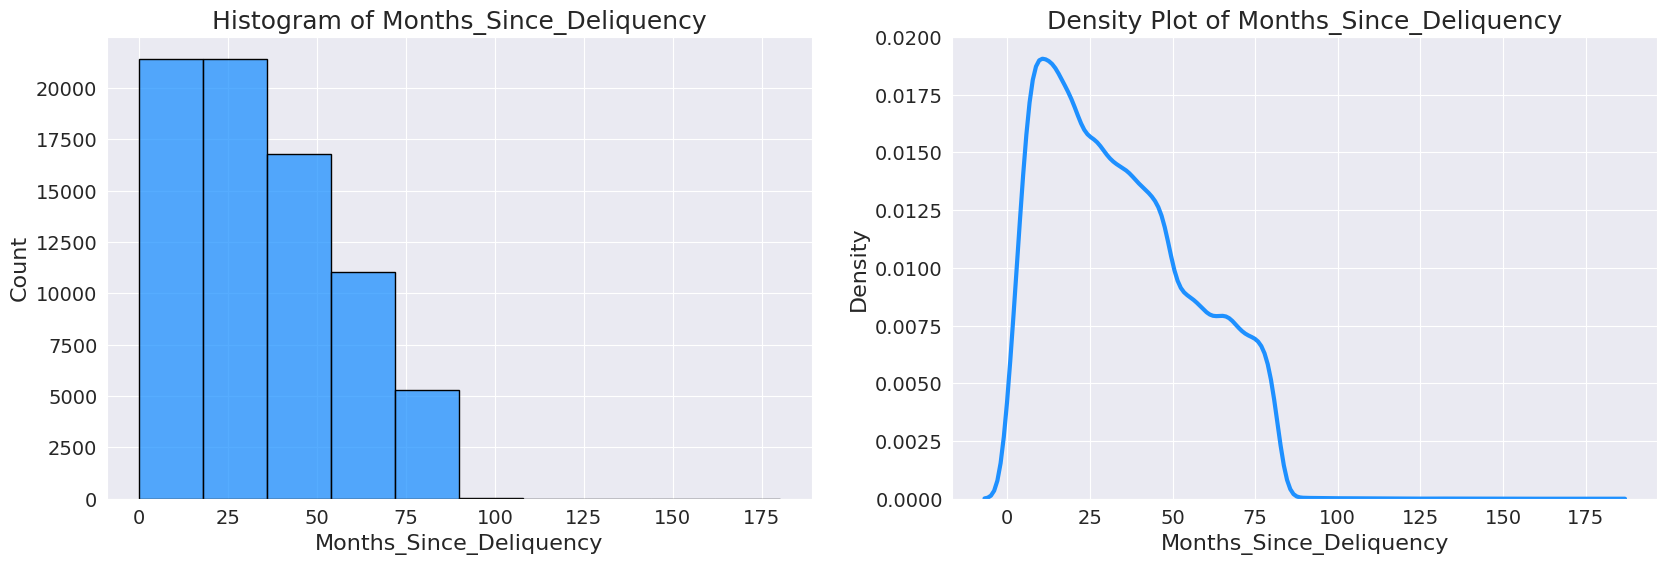

In [314]:
plot_income_distribution(df, 'Months_Since_Deliquency')

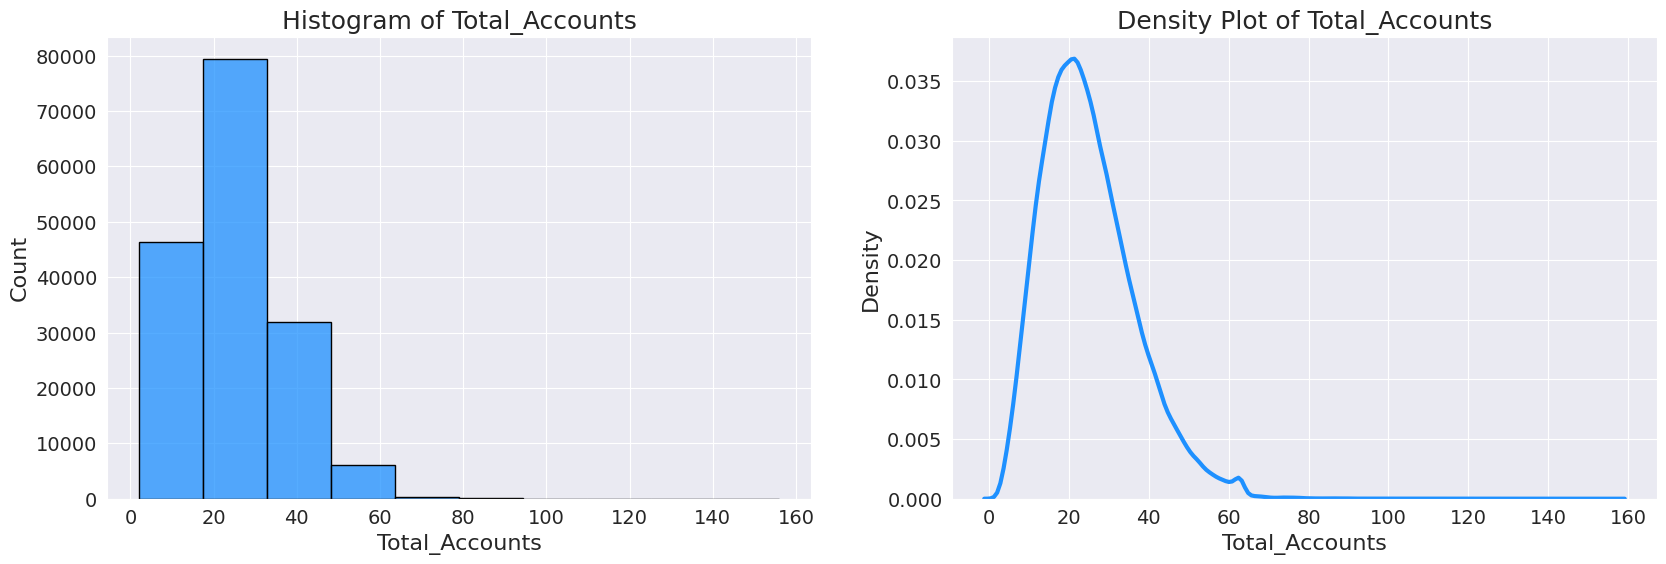

In [315]:
plot_income_distribution(df, 'Total_Accounts')


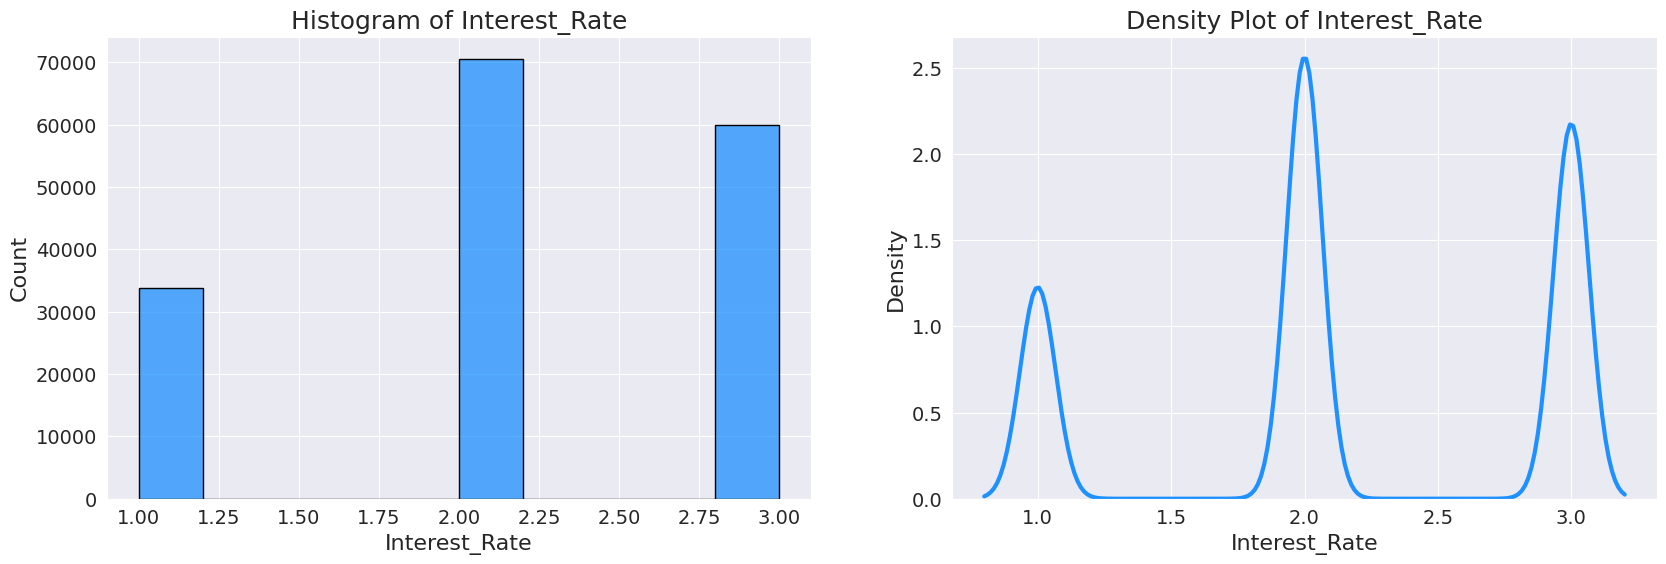

In [316]:
plot_income_distribution(df, 'Interest_Rate')

# Missing value

In [317]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [318]:
df.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [319]:
from sklearn.impute import KNNImputer

def replace_negative_values_KNN(df, features):
    imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
    df_negative_trans = imputer.fit_transform(df[features])
    df_negative_trans = pd.DataFrame(df_negative_trans)
    for i in range(len(features)):
        df[features[i]] = df_negative_trans[i].values
    return df

In [320]:
df.Home_Owner=df.Home_Owner.fillna(df.Home_Owner.mode()[0])

In [321]:
df = replace_negative_values_KNN(df, features = ['Annual_Income'])

In [322]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                     0
Annual_Income                  0
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [323]:
def apply_feature_engineering(df):
    df.drop(['Loan_ID','Months_Since_Deliquency','Number_Open_Accounts'],axis=1,inplace=True)
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
    temp_df = pd.get_dummies(df.loc[:,categorical_cols])
    df_output = pd.concat([temp_df, df.loc[:,numerical_cols]],axis=1)
    return df_output

In [324]:
df = apply_feature_engineering(df)

In [325]:
df.corr()

,Length_Employed_1,Length_Employed_10,Length_Employed_2,Length_Employed_3,Length_Employed_4,Length_Employed_5,Length_Employed_6,Length_Employed_7,Length_Employed_8,Length_Employed_9,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate
Length_Employed_1,1.000000,-0.279653,-0.126806,-0.118803,-0.102099,-0.107698,-0.098214,-0.099431,-0.091292,-0.080919,...,-0.004741,0.017258,0.004218,-0.004218,-0.058807,-0.029918,-0.033161,0.002912,-0.047565,-0.022191
Length_Employed_10,-0.279653,1.000000,-0.215396,-0.201802,-0.173427,-0.182938,-0.166828,-0.168896,-0.155071,-0.137452,...,-0.001016,-0.023482,-0.000748,0.000748,0.120740,0.075408,0.031026,-0.004488,0.117725,0.017343
Length_Employed_2,-0.126806,-0.215396,1.000000,-0.091505,-0.078639,-0.082952,-0.075647,-0.076584,-0.070316,-0.062326,...,-0.003446,0.008249,-0.002166,0.002166,-0.028575,-0.011923,-0.014965,0.004226,-0.029888,-0.009665
Length_Employed_3,-0.118803,-0.201802,-0.091505,1.000000,-0.073676,-0.077717,-0.070873,-0.071751,-0.065878,-0.058393,...,-0.001614,0.007847,-0.003077,0.003077,-0.022976,-0.004167,-0.015199,0.003800,-0.026860,-0.012019
Length_Employed_4,-0.102099,-0.173427,-0.078639,-0.073676,1.000000,-0.066789,-0.060907,-0.061662,-0.056615,-0.050182,...,0.005115,0.006790,0.000307,-0.000307,-0.018722,-0.008392,-0.013644,-0.001867,-0.025270,-0.005893
Length_Employed_5,-0.107698,-0.182938,-0.082952,-0.077717,-0.066789,1.000000,-0.064248,-0.065044,-0.059720,-0.052934,...,0.002383,0.011961,-0.004996,0.004996,-0.015974,-0.006562,-0.005998,0.003053,-0.026547,0.001765
Length_Employed_6,-0.098214,-0.166828,-0.075647,-0.070873,-0.060907,-0.064248,1.000000,-0.059316,-0.054461,-0.048273,...,0.002496,0.003824,-0.001157,0.001157,-0.007193,-0.004784,-0.002161,0.003607,-0.018612,0.004416
Length_Employed_7,-0.099431,-0.168896,-0.076584,-0.071751,-0.061662,-0.065044,-0.059316,1.000000,-0.055136,-0.048871,...,0.001326,-0.005914,0.001452,-0.001452,0.002672,-0.002400,0.005067,0.002925,-0.007739,0.010821
Length_Employed_8,-0.091292,-0.155071,-0.070316,-0.065878,-0.056615,-0.059720,-0.054461,-0.055136,1.000000,-0.044871,...,-0.001329,-0.004774,0.002699,-0.002699,0.004565,0.004475,0.003918,-0.000596,-0.001835,-0.000131
Length_Employed_9,-0.080919,-0.137452,-0.062326,-0.058393,-0.050182,-0.052934,-0.048273,-0.048871,-0.044871,1.000000,...,-0.001790,-0.002094,0.003516,-0.003516,0.012073,0.001602,0.010635,-0.003311,0.002591,0.007134


In [326]:
df.isnull().sum()

Length_Employed_1                     0
Length_Employed_10                    0
Length_Employed_2                     0
Length_Employed_3                     0
Length_Employed_4                     0
Length_Employed_5                     0
Length_Employed_6                     0
Length_Employed_7                     0
Length_Employed_8                     0
Length_Employed_9                     0
Length_Employed_nan                   0
Home_Owner_Mortgage                   0
Home_Owner_Other                      0
Home_Owner_Own                        0
Home_Owner_Rent                       0
Income_Verified_Not_Verified          0
Income_Verified_Verified              0
Purpose_Of_Loan_car                   0
Purpose_Of_Loan_credit_card           0
Purpose_Of_Loan_debt_consolidation    0
Purpose_Of_Loan_educational           0
Purpose_Of_Loan_home_improvement      0
Purpose_Of_Loan_house                 0
Purpose_Of_Loan_major_purchase        0
Purpose_Of_Loan_medical               0


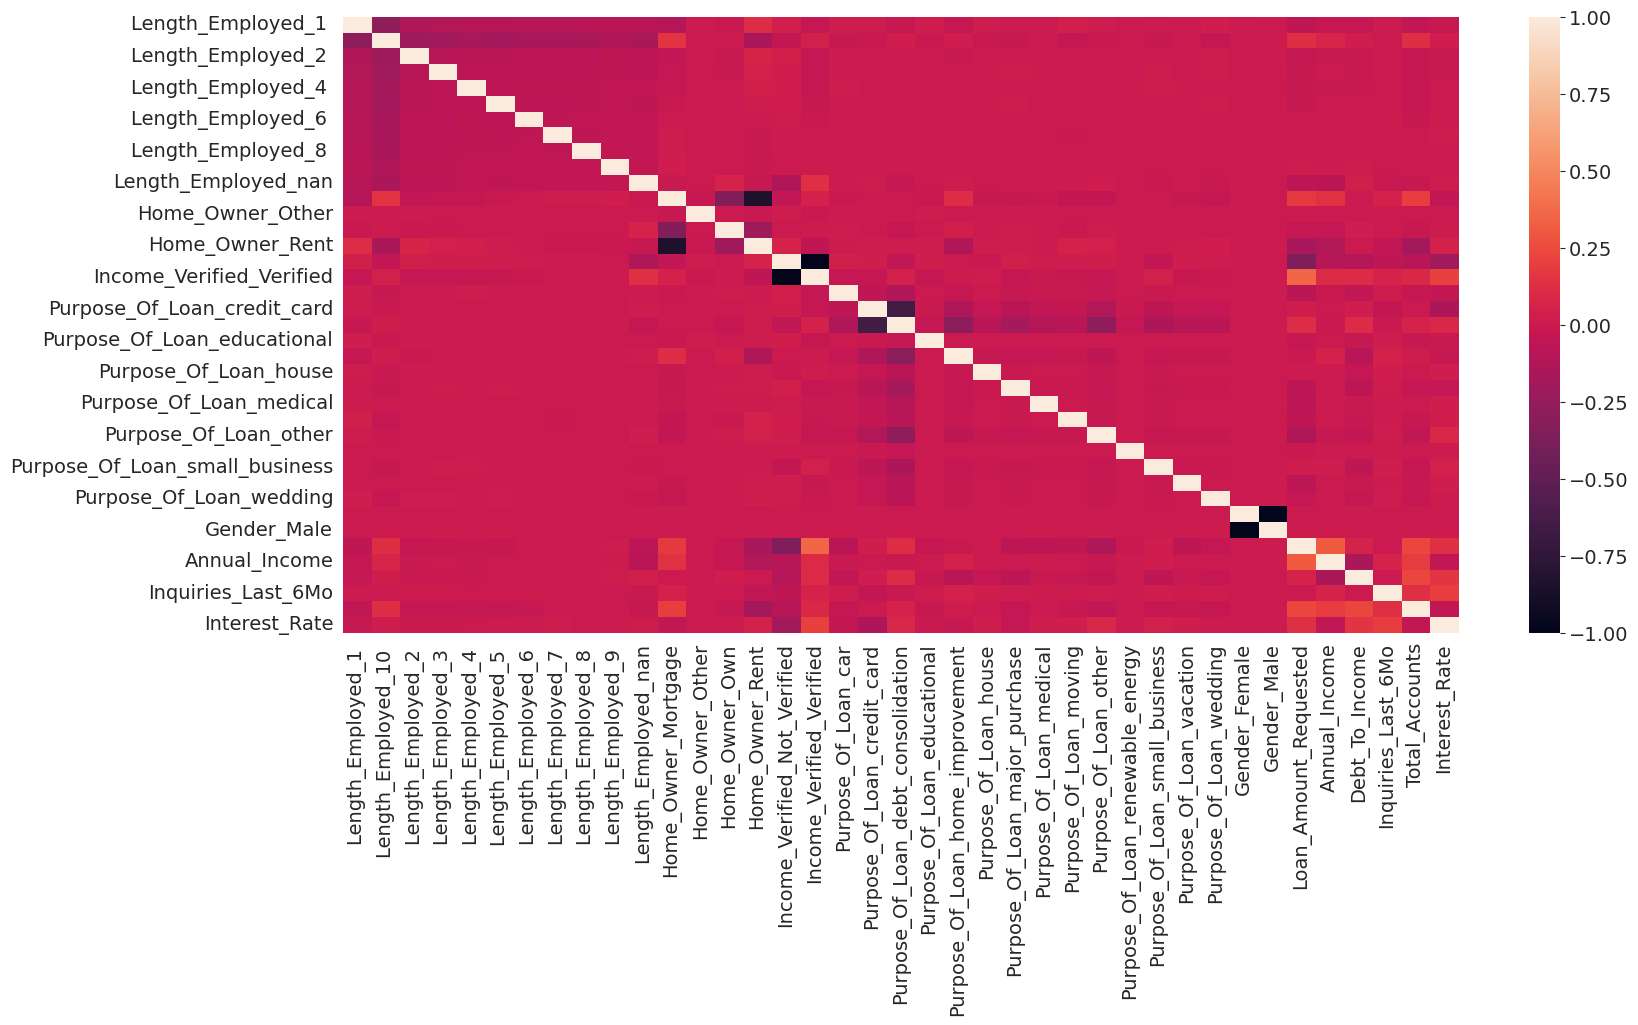

In [327]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr())
plt.show()

In [328]:
columns = df.columns

In [356]:
type(columns)

pandas.core.indexes.base.Index

In [362]:
columns = columns.drop('Interest_Rate')

In [363]:
columns.value_counts().sum()

38

# Train-Test Split

In [329]:
def prepare_data(df, target):
    feature_names = df.columns.tolist()
    feature_names.remove('Interest_Rate')
    X = df[feature_names]
    y = df[target]
    return X, y

In [330]:
X, y = prepare_data(df.copy(), target='Interest_Rate')

In [331]:
""" """
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.75

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = TRAIN_SIZE, random_state = RANDOM_STATE)

In [332]:
# scaler
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler(quantile_range = (25,75))
X_train = scaler.fit_transform(X_train) #fit_transform có tác dụng vừa fit data, vừa transform data
X_test = scaler.transform(X_test)

# Apply Machine Learning

# MLP

In [333]:
from keras import optimizers
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

In [364]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

In [365]:
nn_model = build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
7702/7702 [==============================] - 19s 2ms/step - loss: -40.6341 - accuracy: 0.2033 - val_loss: -116.4771 - val_accuracy: 0.2038
Epoch 2/100
7702/7702 [==============================] - 19s 2ms/step - loss: -251.6574 - accuracy: 0.2064 - val_loss: -423.5906 - val_accuracy: 0.2038
Epoch 3/100
7702/7702 [==============================] - 19s 2ms/step - loss: -646.3983 - accuracy: 0.2064 - val_loss: -913.9542 - val_accuracy: 0.2038
Epoch 4/100
7702/7702 [==============================] - 19s 2ms/step - loss: -1219.3816 - accuracy: 0.2064 - val_loss: -1582.1967 - val_accuracy: 0.2038
Epoch 5/100
7702/7702 [==============================] - 19s 2ms/step - loss: -1967.9187 - accuracy: 0.2064 - val_loss: -2427.6521 - val_accuracy: 0.2038
Epoch 6/100
7702/7702 [==============================] - 17s 2ms/step - loss: -2890.0508 - accuracy: 0.2064 - val_loss: -3448.3198 - val_accuracy: 0.2038
Epoch 7/100
7702/7702 [==============================] - 19s 2ms/step - loss: -3984

KeyboardInterrupt: ignored

In [336]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_performance(y_test, y_pred):

    print("Accuracy: ", accuracy_score(y_test , y_pred))
    print("Precision: ", precision_score(y_test , y_pred, average = 'macro'))
    print("Recall: ", recall_score(y_test , y_pred, average = 'macro'))
    print("F1: ", f1_score(y_test , y_pred, average = 'macro'))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
    print("Classification report: \n", classification_report(y_test , y_pred))
    main_score =  f1_score(y_test , y_pred, average = 'macro')
    return main_score

In [347]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

loss, accuracy = nn_model.evaluate(X_test, y_test)

ValueError: ignored

In [343]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
cv_n_split = 3
test_train_split_part = 0.2
random_state = 40
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [ ]:
nn_model = build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=100, validation_data=(Xval, Zval))